In [7]:

# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import datetime
from sklearn import tree 
from sklearn import preprocessing
from io import StringIO
from IPython.display import Image, display
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Lectura de dataframes

In [2]:
df = pd.read_csv('salary.csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Analisis de nulos por cada columna

In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Breve conteo de datos

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [10]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [11]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [13]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [14]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [15]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

## Correlaciones

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [18]:
columns_use = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [19]:
df.loc[ :, columns_use ].corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [20]:
corr_use = df.loc[ :, columns_use ].corr()

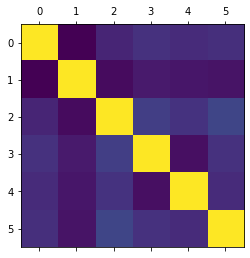

In [21]:
plt.matshow( corr_use )

<AxesSubplot:>

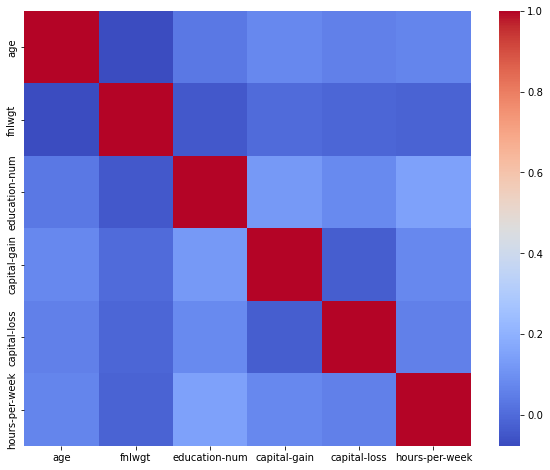

In [22]:
f, ax = plt.subplots( figsize=(10, 8) )

sns.heatmap( corr_use , cmap=sns.color_palette("coolwarm", as_cmap=True))

## Nuevo estudio profundizando otras columnas

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x26b29140fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x26b29153640>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b29140b50>],
 'medians': [<matplotlib.lines.Line2D at 0x26b29153d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b2915f130>],
 'means': []}

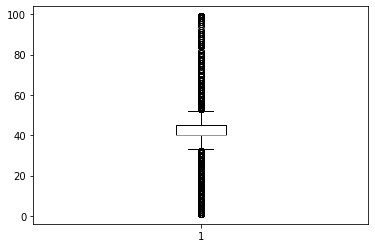

In [24]:
plt.boxplot( df['hours-per-week'] )

In [25]:
median = np.median(df['hours-per-week'])

In [26]:
df.loc[df['hours-per-week'] > 60 , 'hours-per-week'] = median
df.loc[df['hours-per-week'] <30 , 'hours-per-week'] = median

{'whiskers': [<matplotlib.lines.Line2D at 0x26b291b4e20>,
 'caps': [<matplotlib.lines.Line2D at 0x26b291c4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b291b4a60>],
 'medians': [<matplotlib.lines.Line2D at 0x26b291c4ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b291d0070>],
 'means': []}

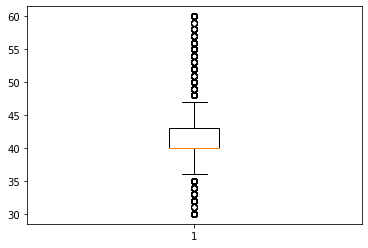

In [27]:
plt.boxplot( df['hours-per-week'] )

<AxesSubplot:>

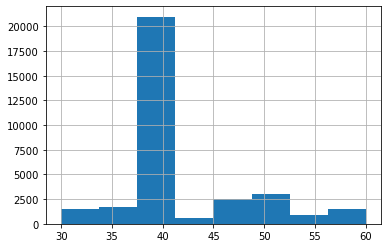

In [28]:
df['hours-per-week'].hist( bins = 8 )

In [29]:
graf = df["workclass"].value_counts().reset_index()
graf.columns = ["workclass", "hours-per-week"]
graf

,workclass,hours-per-week
0,Private,22696
1,Self-emp-not-inc,2541
2,Local-gov,2093
3,?,1836
4,State-gov,1298
5,Self-emp-inc,1116
6,Federal-gov,960
7,Without-pay,14
8,Never-worked,7


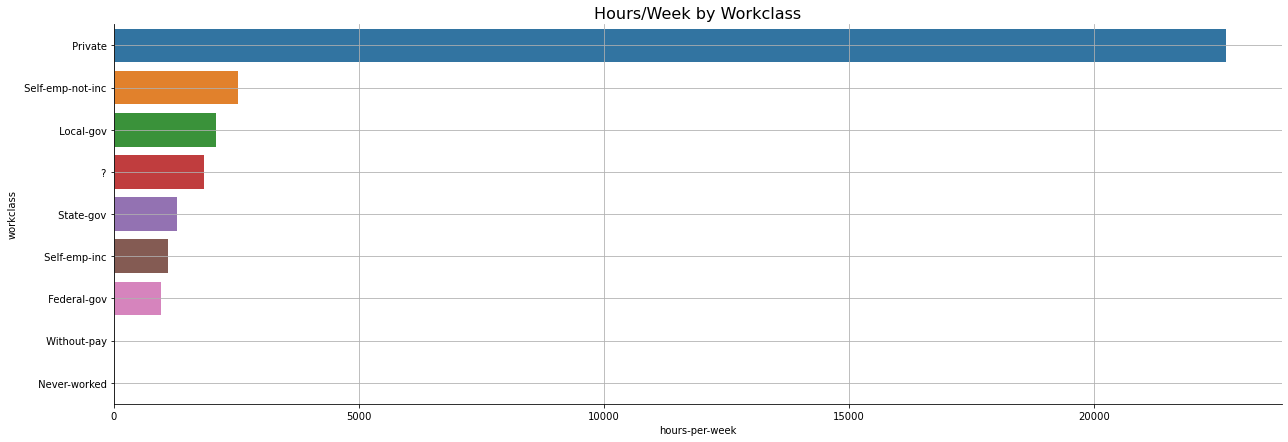

In [30]:
sns.catplot(x="hours-per-week", y="workclass", kind="bar", data=graf, height=6, aspect=3)
plt.title('Hours/Week by Workclass',fontsize=16)

plt.grid(True)

## fnlwgt

In [31]:
medianf = np.median(df['fnlwgt'])

In [32]:
p99 = np.quantile (df['fnlwgt'] , .99)

In [33]:
df.loc[df['fnlwgt'] > p99 , 'fnlwgt'] = medianf

{'whiskers': [<matplotlib.lines.Line2D at 0x26b29a05cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26b29c563d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b29a05940>],
 'medians': [<matplotlib.lines.Line2D at 0x26b29c56af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b29c56e80>],
 'means': []}

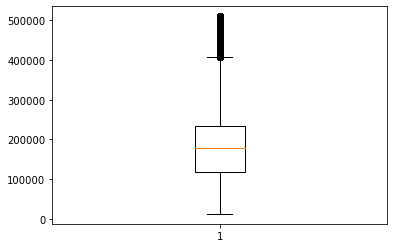

In [34]:
plt.boxplot( df['fnlwgt'] )

## education-num

In [35]:
medianed = np.median(df['education-num'])

In [36]:
df.loc[df['education-num'] < 5 , 'education-num'] = medianed

{'whiskers': [<matplotlib.lines.Line2D at 0x26b29cb8400>,
 'caps': [<matplotlib.lines.Line2D at 0x26b29cb8b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b29cb8070>],
 'medians': [<matplotlib.lines.Line2D at 0x26b29cc5280>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b29cc5610>],
 'means': []}

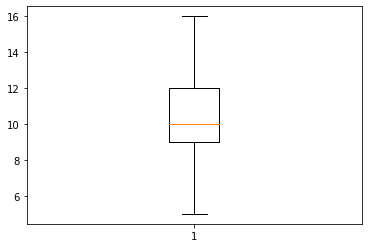

In [37]:
plt.boxplot( df['education-num'] )

## age

In [38]:
medianage = np.median(df['age'])

In [39]:
df.loc[df['age'] >75 , 'age'] = medianage

{'whiskers': [<matplotlib.lines.Line2D at 0x26b29d17d60>,
 'caps': [<matplotlib.lines.Line2D at 0x26b29d244c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b29d17a30>],
 'medians': [<matplotlib.lines.Line2D at 0x26b29d24be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b29d24f70>],
 'means': []}

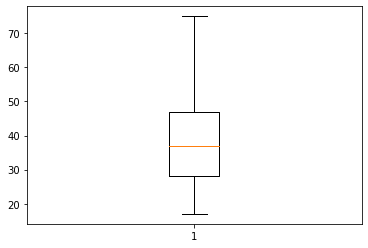

In [40]:
plt.boxplot( df['age'] )

## Analisis Exploratorio de datos

In [41]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [42]:
df.groupby( ["workclass"] ).agg( { "education" : ["count"] } ) / df.shape[0]

,education
,count
workclass,
?,0.056386
Federal-gov,0.029483
Local-gov,0.064279
Never-worked,0.000215
Private,0.697030
Self-emp-inc,0.034274
Self-emp-not-inc,0.078038
State-gov,0.039864


In [43]:
def print_bars( df , col  ):
    x  = df.groupby( [col] , as_index = False ).agg( { "sex" : ["count"] } ) 
    x.columns = x.columns.droplevel(1)
    x.columns = [col,'count']
    x = x.sort_values(["count"], ascending=False)
    plt.bar( x[col] , x['count'] )

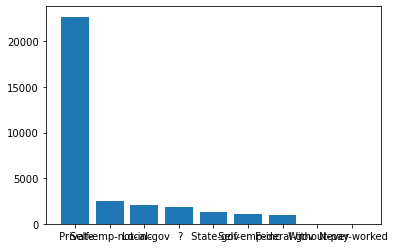

In [44]:
print_bars( df , "workclass" )

In [45]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

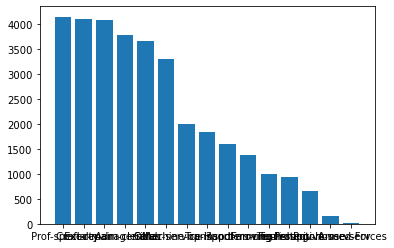

In [46]:
print_bars( df , "occupation" )

In [47]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

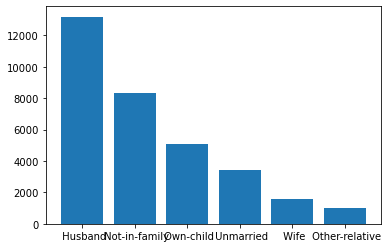

In [48]:
print_bars( df , "relationship" )

In [49]:
df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [50]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [51]:
df.loc[:,["relationship","salary"]]

,relationship,salary
0,Not-in-family,<=50K
1,Husband,<=50K
2,Not-in-family,<=50K
3,Husband,<=50K
4,Wife,<=50K
...,...,...
32556,Wife,<=50K
32557,Husband,>50K
32558,Unmarried,<=50K
32559,Own-child,<=50K


In [52]:
df.loc[:,["sex","salary"]].groupby(['sex','salary']).agg( { "sex" : ["count"] } ) 

sex
                count
sex     salary       
 Female  <=50K   9592
         >50K    1179
 Male    <=50K  15128
         >50K    6662

## Prueba de independencia mediante chi2

In [53]:
df.groupby( ["occupation","salary","sex"] ).agg( { "sex" : ["count"] } )

sex
                                  count
occupation         salary sex          
 ?                  <=50K  Female   789
                           Male     863
                    >50K   Female    52
                           Male     139
 Adm-clerical       <=50K  Female  2325
                           Male     938
                    >50K   Female   212
                           Male     295
 Armed-Forces       <=50K  Male       8
                    >50K   Male       1
 Craft-repair       <=50K  Female   202
                           Male    2968
                    >50K   Female    20
                           Male     909
 Exec-managerial    <=50K  Female   879
                           Male    1219
                    >50K   Female   280
                           Male    1688
 Farming-fishing    <=50K  Female    63
                           Male     816
                    >50K   Female     2
                           Male     113
 Handlers-cleaners  <=50K  Female   160
                           Male    1124
                    >50K   Female     4
                           Male      82
 Machine-op-inspct  <=50K  Female   530
                           Male    1222
                    >50K   Female    20
                           Male     230
 Other-service      <=50K  Female  1749
                           Male    1409
                    >50K   Female    51
                           Male      86
 Priv-house-serv    <=50K  Female   140
                           Male       8
                    >50K   Female     1
 Prof-specialty     <=50K  Female  1130
                           Male    1151
                    >50K   Female   385
                           Male    1474
 Protective-serv    <=50K  Female    66
                           Male     372
                    >50K   Female    10
                           Male     201
 Sales              <=50K  Female  1175
                           Male    1492
                    >50K   Female    88
                           Male     895
 Tech-support       <=50K  Female   303
                           Male     342
                    >50K   Female    45
                           Male     238
 Transport-moving   <=50K  Female    81
                           Male    1196
                    >50K   Female     9
                           Male     311

In [54]:
contigency1 = pd.crosstab( df['occupation'] , df['salary'] )

In [55]:
contigency1

salary,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


In [56]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='salary', ylabel='occupation'>

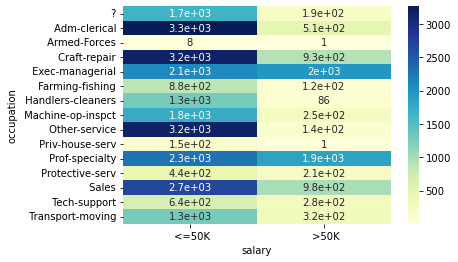

In [57]:
sns.heatmap( contigency1 , annot = True , cmap="YlGnBu" )

In [58]:
c, p, dof, expected = chi2_contingency(contigency1)

In [59]:
p

0.0

In [60]:
contigency2 = pd.crosstab( df['occupation'] , df['sex'] )

In [61]:
contigency2

sex,Female,Male
occupation,,
?,841,1002
Adm-clerical,2537,1233
Armed-Forces,0,9
Craft-repair,222,3877
Exec-managerial,1159,2907
Farming-fishing,65,929
Handlers-cleaners,164,1206
Machine-op-inspct,550,1452
Other-service,1800,1495


In [62]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='sex', ylabel='occupation'>

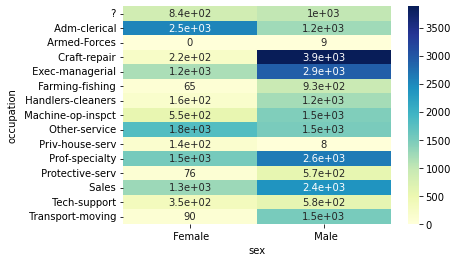

In [63]:
sns.heatmap( contigency2 , annot = True , cmap="YlGnBu" )

In [64]:
c, p, dof, expected = chi2_contingency(contigency1)

In [65]:
p

0.0

## **Árboles de decisión**

In [66]:
from sklearn import preprocessing
from sklearn import tree
label_encoder = preprocessing.LabelEncoder()

<AxesSubplot:>

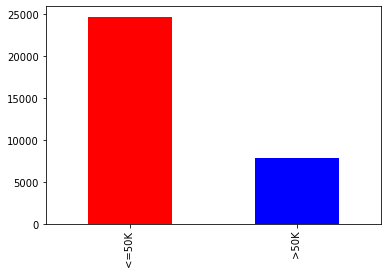

In [67]:
df.salary.value_counts().plot( kind='bar' , color=['r','b'] )

In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [69]:
df.loc[ pd.isna( df['workclass'] ) , :]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [70]:
df.loc [ pd.isnull( df['workclass']) , : ].shape[0] / df.shape[0]

0.0

In [71]:
encoder_morethan50 = label_encoder.fit_transform ( df['salary'] ) 

In [72]:
entrenamiento = df

In [73]:
entrenamiento = entrenamiento.drop( ['education-num','marital-status','relationship','salary','hours-per-week'] , axis = 1)

In [74]:
categorical_cols = [cname for cname in entrenamiento.columns if entrenamiento[cname].dtype == "object" ]
numerical_cols = [cname for cname in entrenamiento.columns if entrenamiento[cname].dtype != "object" ]

In [75]:
union_cols = categorical_cols + numerical_cols

In [76]:
dummie_encoded_train_predictors = pd.get_dummies(entrenamiento[union_cols])

In [77]:
dummie_encoded_train_predictors.head()

,age,fnlwgt,capital-gain,capital-loss,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,2174,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_target = df['salary'].values
x = dummie_encoded_train_predictors.values

In [79]:
y_target

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [80]:
x

array([[    39,  77516,   2174, ...,      1,      0,      0],
       [    50,  83311,      0, ...,      1,      0,      0],
       [    38, 215646,      0, ...,      1,      0,      0],
       ...,
       [    58, 151910,      0, ...,      1,      0,      0],
       [    22, 201490,      0, ...,      1,      0,      0],
       [    52, 287927,  15024, ...,      1,      0,      0]], dtype=int64)

In [81]:
x_train, x_validation, y_train, y_validation = train_test_split(x , y_target, test_size = .25, random_state = 1)

In [82]:
arbol_a = tree.DecisionTreeClassifier()

In [83]:
arbol_a = arbol_a.fit( x_train, y_train )

In [84]:
arbol_a_precision = round(arbol_a.score(x_validation,y_validation),4)
print('Precision: %0.4f' % (arbol_a_precision))

Precision: 0.7877


In [85]:
x_validation

array([[    62,  26911,      0, ...,      1,      0,      0],
       [    18, 208103,      0, ...,      1,      0,      0],
       [    25, 102476,  27828, ...,      1,      0,      0],
       ...,
       [    28, 107236,      0, ...,      1,      0,      0],
       [    45, 186473,      0, ...,      1,      0,      0],
       [    19, 318822,      0, ...,      1,      0,      0]], dtype=int64)

In [86]:
x

array([[    39,  77516,   2174, ...,      1,      0,      0],
       [    50,  83311,      0, ...,      1,      0,      0],
       [    38, 215646,      0, ...,      1,      0,      0],
       ...,
       [    58, 151910,      0, ...,      1,      0,      0],
       [    22, 201490,      0, ...,      1,      0,      0],
       [    52, 287927,  15024, ...,      1,      0,      0]], dtype=int64)

## **Regresión Lineal**

##### 1. Analisis sobre el salario de acuerdo a la educacion, generando un conteo.

In [87]:
analisis1 = pd.DataFrame

analisis1 = df.groupby(['occupation','salary'],as_index=False).agg({'sex':['count']}).drop_duplicates()
analisis1.columns.droplevel(1)
analisis1.columns = ['occupation', 'salary', 'total person by sex']
analisis1['sex'] = df['sex']
analisis1['education'] = df['education']
analisis1['education-num'] =df['education-num']
analisis1 = analisis1.reindex(columns=['occupation', 'salary', 'total person by sex', 'sex', 'education-num','education'])

analisis1

,occupation,salary,total person by sex,sex,education-num,education
0,?,<=50K,1652,Male,13,Bachelors
1,?,>50K,191,Male,13,Bachelors
2,Adm-clerical,<=50K,3263,Male,9,HS-grad
3,Adm-clerical,>50K,507,Male,7,11th
4,Armed-Forces,<=50K,8,Female,13,Bachelors
5,Armed-Forces,>50K,1,Female,14,Masters
6,Craft-repair,<=50K,3170,Female,5,9th
7,Craft-repair,>50K,929,Male,9,HS-grad
8,Exec-managerial,<=50K,2098,Female,14,Masters
9,Exec-managerial,>50K,1968,Male,13,Bachelors


##### Muestra Mujeres

* Segmentacion del analisis anterior de acuerdo al genero para estudio de regresion lineal, con la idea de tomar una muestra de los datos en general, y reducir el estudio a una muestra mas pequeña. 
* Se creo data dummy para el caso del salario ('salary_dummy'), ya que este dataset no contempla un salario como tal, sino mas bien esta tomado entre rangos menores, iguales y o mayores a 50k.

In [88]:
female = analisis1.loc[ analisis1['sex'].str.contains('Female') , ['education','salary'] ].drop_duplicates()
female.sort_values('salary',ascending=False)
female['education-num'] = female['education'].rank(ascending=False)
female['salary-dummy'] = '52000','50500','47500','49500','48000','46500'
female = female.reindex(columns=['education-num','education', 'salary',  'salary-dummy'])
female

,education-num,education,salary,salary-dummy
4,5.0,Bachelors,<=50K,52000
5,1.5,Masters,>50K,50500
6,6.0,9th,<=50K,47500
8,1.5,Masters,<=50K,49500
21,3.5,HS-grad,>50K,48000
24,3.5,HS-grad,<=50K,46500


In [89]:
female['salary-dummy'] = female['salary-dummy'].astype(object).astype(int)

In [90]:
female.shape

(6, 4)

In [91]:
y = female.loc[:,'salary-dummy'].values
x = female.loc[:,'education-num'].values

In [92]:
x.reshape(-1,1)

array([[5. ],
       [1.5],
       [6. ],
       [1.5],
       [3.5],
       [3.5]])

In [93]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size=0.4,random_state=0)

In [94]:
len(X_Train)

3

In [95]:
len(Y_Train)

3

In [96]:
regr = LinearRegression()

In [97]:
regr.fit(np.reshape(X_Train, (-1, 1)), Y_Train)

LinearRegression()

In [98]:
regr.predict(np.reshape(X_Train,(-1,1)))

array([48668.91891892, 50891.89189189, 49939.18918919])

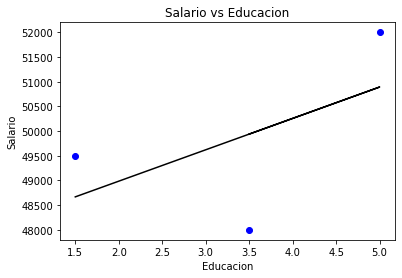

In [99]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regr.predict(np.reshape(X_Train,(-1,1))), color = 'black')
viz_train.title('Salario vs Educacion')
viz_train.xlabel('Educacion')
viz_train.ylabel('Salario')
viz_train.show()

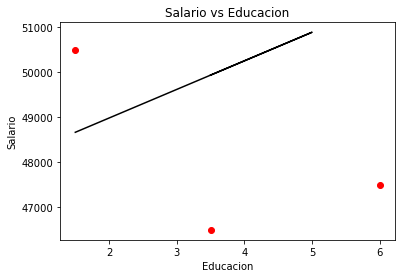

In [100]:
viz_test = plt
viz_test.scatter(X_Test, Y_Test, color = 'red')
viz_test.plot(X_Train,regr.predict(np.reshape(X_Train,(-1,1))), color = 'black')
viz_test.title('Salario vs Educacion')
viz_test.xlabel("Educacion")
viz_test.ylabel("Salario")
viz_test.show()

In [101]:
regr.score(np.reshape(X_Test,(-1,1)), np.reshape(Y_Test,(-1,1)))

-2.622826178569431

##### Muestra Hombres

* Segmentacion del analisis anterior de acuerdo al genero para estudio de regresion lineal, con la idea de tomar una muestra de los datos en general, y reducir el estudio a una muestra mas pequeña. 
* Se creo data dummy para el caso del salario ('salary_dummy'), ya que este dataset no contempla un salario como tal, sino mas bien esta tomado entre rangos menores, iguales y o mayores a 50k.

In [102]:
analisis2 = pd.DataFrame
analisis2 = analisis1
analisis2

,occupation,salary,total person by sex,sex,education-num,education
0,?,<=50K,1652,Male,13,Bachelors
1,?,>50K,191,Male,13,Bachelors
2,Adm-clerical,<=50K,3263,Male,9,HS-grad
3,Adm-clerical,>50K,507,Male,7,11th
4,Armed-Forces,<=50K,8,Female,13,Bachelors
5,Armed-Forces,>50K,1,Female,14,Masters
6,Craft-repair,<=50K,3170,Female,5,9th
7,Craft-repair,>50K,929,Male,9,HS-grad
8,Exec-managerial,<=50K,2098,Female,14,Masters
9,Exec-managerial,>50K,1968,Male,13,Bachelors


In [103]:
male = analisis2.loc[ analisis1['sex'].str.contains('male') , ['occupation','salary'] ].drop_duplicates()
male.sort_values('salary',ascending=False)
male['occupation-num'] = male['occupation'].rank(ascending=False)
male['salary-dummy'] = '48000','51000','49500','47300','46000','52000','52500','49700'
male = male.reindex(columns=['occupation-num','occupation', 'salary',  'salary-dummy'])
male

,occupation-num,occupation,salary,salary-dummy
4,7.5,Armed-Forces,<=50K,48000
5,7.5,Armed-Forces,>50K,51000
6,6.0,Craft-repair,<=50K,49500
8,5.0,Exec-managerial,<=50K,47300
12,4.0,Handlers-cleaners,<=50K,46000
19,3.0,Priv-house-serv,>50K,52000
21,2.0,Prof-specialty,>50K,52500
24,1.0,Sales,<=50K,49700


In [104]:
male['salary-dummy'] = male['salary-dummy'].astype(object).astype(int)

In [105]:
male.shape

(8, 4)

In [106]:
y = male.loc[:,'salary-dummy'].values
x = male.loc[:,'occupation-num'].values

In [107]:
x.reshape(-1,1)

array([[7.5],
       [7.5],
       [6. ],
       [5. ],
       [4. ],
       [3. ],
       [2. ],
       [1. ]])

In [108]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size=0.2,random_state=0)

In [109]:
len(X_Train)

6

In [110]:
len(Y_Train)

6

In [111]:
regr = LinearRegression()

In [112]:
regr.fit(np.reshape(X_Train, (-1, 1)), Y_Train)

LinearRegression()

In [113]:
regr.predict(np.reshape(X_Train,(-1,1)))

array([48715.2284264 , 49368.52791878, 48966.49746193, 48715.2284264 ,
       49167.51269036, 49067.00507614])

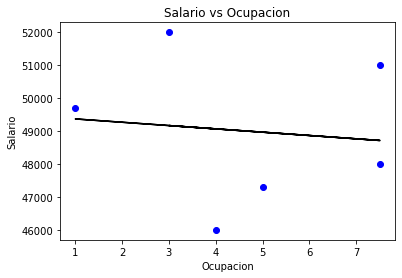

In [114]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regr.predict(np.reshape(X_Train,(-1,1))), color = 'black')
viz_train.title('Salario vs Ocupacion')
viz_train.xlabel('Ocupacion')
viz_train.ylabel('Salario')
viz_train.show()

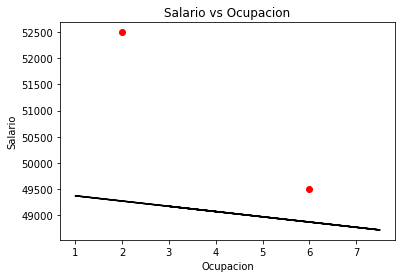

In [115]:
viz_test = plt
viz_test.scatter(X_Test, Y_Test, color = 'red')
viz_test.plot(X_Train,regr.predict(np.reshape(X_Train,(-1,1))), color = 'black')
viz_test.title('Salario vs Ocupacion')
viz_test.xlabel('Ocupacion')
viz_test.ylabel('Salario')
viz_test.show()

regr.score(np.reshape(X_Test,(-1,1)), np.reshape(Y_Test,(-1,1)))

### Otros Analisis

Analisis de cuantas horas se trabajan por edad

In [116]:
e = df.groupby(['age'],as_index = False).agg({'hours-per-week':['sum']}).drop_duplicates()
e.columns.droplevel(1)
e.columns = ['age', 'hours-per-week-suma']
e

,age,hours-per-week-suma
0,17,15449
1,18,21498
2,19,27911
3,20,29555
4,21,28525
5,22,30570
6,23,35431
7,24,32675
8,25,34461
9,26,32814


Promedio de mujeres y hombres por pais

In [117]:
P = df.loc[df['sex'].str.contains('Female'),['native-country']]
P['sex']=df['sex'] 
P = P.groupby(['native-country'],as_index = False).agg({'sex':['count']})
P.columns.droplevel(1)
P.columns =['native-country','sex']
P['mean'] = P['sex'] /100
P

,native-country,sex,mean
0,?,163,1.63
1,Cambodia,3,0.03
2,Canada,39,0.39
3,China,21,0.21
4,Columbia,24,0.24
5,Cuba,40,0.40
6,Dominican-Republic,35,0.35
7,Ecuador,9,0.09
8,El-Salvador,35,0.35
9,England,32,0.32


In [118]:
j = df.loc[df['sex'].str.contains('Male'),['native-country']]
j['sex']=df['sex'] 
j = P.groupby(['native-country'],as_index = False).agg({'sex':['count']})
j.columns.droplevel(1)
j.columns =['native-country','sex']
j['mean'] = P['sex'] /100
j


,native-country,sex,mean
0,?,1,1.63
1,Cambodia,1,0.03
2,Canada,1,0.39
3,China,1,0.21
4,Columbia,1,0.24
5,Cuba,1,0.40
6,Dominican-Republic,1,0.35
7,Ecuador,1,0.09
8,El-Salvador,1,0.35
9,England,1,0.32


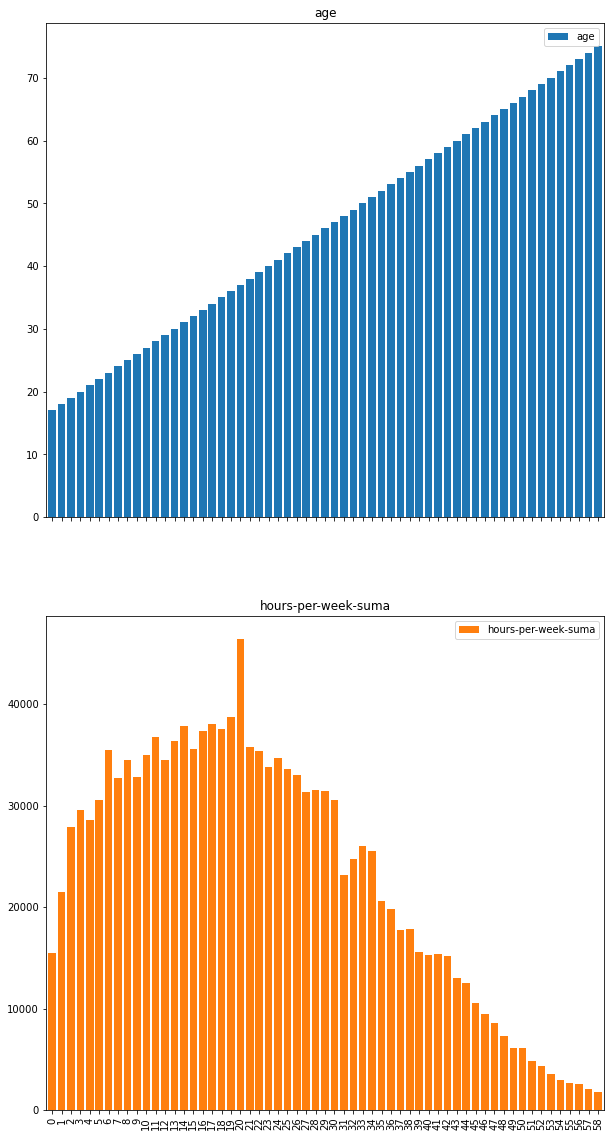

In [119]:
e.plot(kind = 'bar',
             width=0.8,
             subplots=True,
             figsize=(10,20));

In [3]:
def print_bars( df , col  ):
    x  = df.groupby( [col] , as_index = False ).agg( { "sex" : ["count"] } ) 
    x.columns = x.columns.droplevel(1)
    x.columns = [col,'count']
    x = x.sort_values(["count"], ascending=False)
    plt.bar( x[col] , x['count'] )

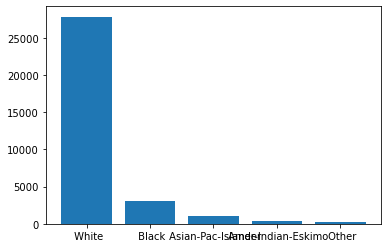

In [4]:
print_bars( df , "race" )

Podemos ver una gran diferencia de raza donde predomina mas la blanca

Analisis entre edad y numero de educacion

Gráfico

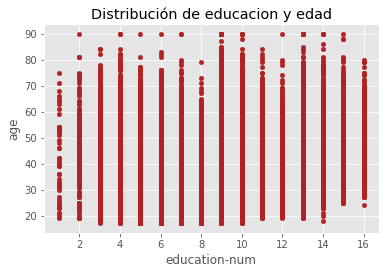

In [8]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'education-num',
    y    = 'age',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de educacion y edad');

Correlación lineal entre las dos variables

In [9]:
corr_test = pearsonr(x = df['education-num'], y =  df['age'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.036527189464105984
P-value:  4.305718002102886e-11


 intentar generar un modelo de regresión lineal con el objetivo de predecir el número de edad en función del número de educacion que obtuvieron.

División de los datos en train y testDivisión de los datos en train y test

In [11]:
X = df[['education-num']]
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

Información del modelo

In [12]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [36.41435047]
Coeficiente: [('education-num', 0.21163676365551348)]
Coeficiente de determinación R^2: 0.001316586293315769


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [14]:
# Error de test del modelo 
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[39.1656284 ]
 [39.1656284 ]
 [37.26089753]]

El error (rmse) de test es: 13.587538784011215


Creación del modelo utilizando matrices como en scikitlearn

In [15]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     41.50
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.20e-10
Time:                        08:38:19   Log-Likelihood:            -1.0503e+05
No. Observations:               26048   AIC:                         2.101e+05
Df Residuals:                   26046   BIC:                         2.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4144      0.342    106.490      0.0

In [16]:
modelo.conf_int(alpha=0.02)

array([[35.61880478, 37.20989616],
       [ 0.13520817,  0.28806536]])

según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

Predicciones con intervalo de confianza del 98%

In [19]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.02)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,38.319081,0.091750,38.105625,38.532537,6.578814,70.059349
1,39.165628,0.127709,38.868514,39.462743,7.424688,70.906569
2,38.319081,0.091750,38.105625,38.532537,6.578814,70.059349
3,38.319081,0.091750,38.105625,38.532537,6.578814,70.059349


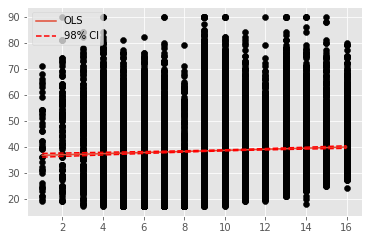

In [20]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.02)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "black")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="98% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

El valor de R-squared indica que el modelo es capaz de explicar el 0.1% de la variabilidad observada en la variable respuesta (edad). Además, el p-value obtenido en el test F (Prob (F-statistic) =  1.20e-10) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).
El modelo lineal generado sigue la ecuación:

edad= 36.4144 + 0.2 numero de educacion 
 
Por cada unidad que se incrementa el número de educacion, el número de educacion aumenta en promedio 0.2 unidades.

El error de test del modelo es de 13.57. Las predicciones del modelo final se alejan en promedio 13.57 unidades del valor real.